In [1]:
!pip install yfinance
!pip install requests
!pip install beautifulsoup4
!pip install lxml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 34.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 86.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 22.0 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15548 sha256=2f9e04bbb700b6555bce3ce3e0359561ecd03ab804549c345ab017c2c9381e2c
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/42/d6/84/bf57a755f4569494cd00de4bb46ef064874823f4d19c82e960
  Created wheel for peewee: filename=peewee-3.18.2-cp311-cp311-linux_x86_64.whl size=299453 sha256=1f8238d45e5f3ac34870a0be5f1a12d399a44750d18e25bbb0f9bb3b18ef2beb
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/

In [6]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table")

tesla_revenue = pd.read_html(StringIO(str(tables[1])))[0]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace(r"[\$,]", "", regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

tesla_revenue.tail()


,Date,Revenue
59,2010-06-30,28.0
60,2010-03-31,21.0
61,2009-12-31,NaN
62,2009-09-30,46.0
63,2009-06-30,27.0


In [9]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [10]:
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response_gme = requests.get(url_gme, headers=headers)
soup_gme = BeautifulSoup(response_gme.text, "html.parser")
tables_gme = soup_gme.find_all("table")

gme_revenue = pd.read_html(StringIO(str(tables_gme[1])))[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace(r"[\$,]", "", regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

gme_revenue.tail()

,Date,Revenue
61,2010-01-31,3524.0
62,2009-10-31,1835.0
63,2009-07-31,1739.0
64,2009-04-30,1981.0
65,2009-01-31,3492.0


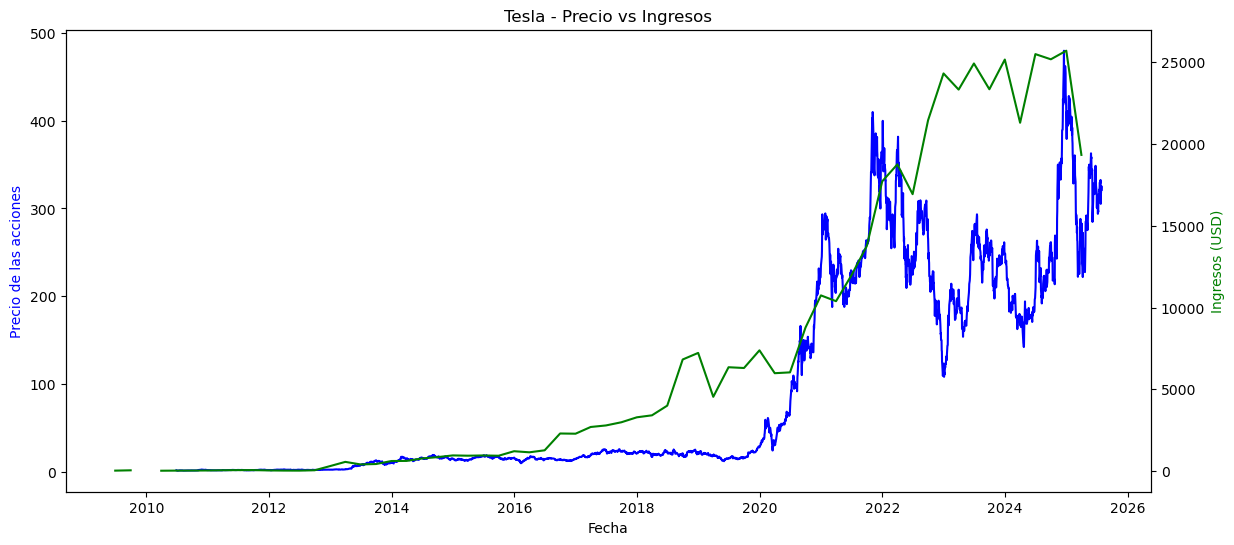

In [11]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock, color):
    fig, ax1 = plt.subplots(figsize=(14,6))
    ax1.plot(stock_data["Date"], stock_data["Close"], color=color, label="Precio Acciones")
    ax1.set_ylabel("Precio de las acciones", color=color)
    ax1.set_xlabel("Fecha")
    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], color='green', label="Ingresos")
    ax2.set_ylabel("Ingresos (USD)", color='green')
    plt.title(f"{stock} - Precio vs Ingresos")
    plt.show()

make_graph(tesla_data, tesla_revenue, 'Tesla', 'blue')

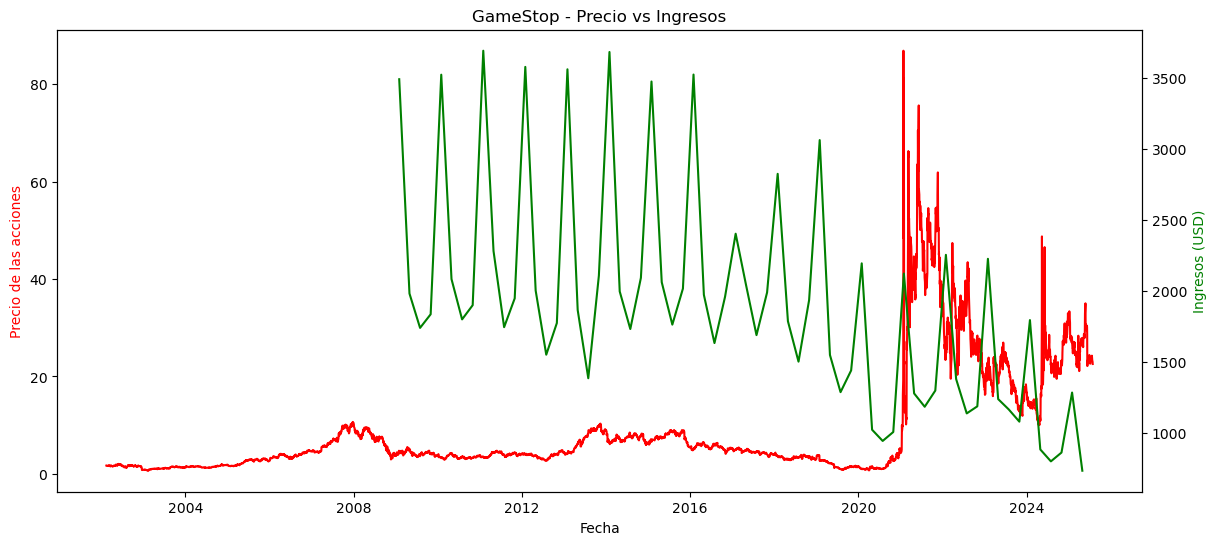

In [12]:
make_graph(gme_data, gme_revenue, 'GameStop', 'red')